In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("C:\\Users\\Lenovo\\Downloads\\News1.csv")
data.head(20)

,Unnamed: 0,title,text,subject,date,class
0,0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [3]:
data.shape

(44919, 6)

In [4]:
#Preprocessing
data.drop(["title","subject","date","Unnamed: 0"],axis=1,inplace=True)

In [5]:
data.head(20)

,text,class
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0
5,The number of cases of cops brutalizing and ki...,0
6,Donald Trump spent a good portion of his day a...,0
7,In the wake of yet another court decision that...,0
8,Many people have raised the alarm regarding th...,0
9,Just when you might have thought we d get a br...,0


In [6]:
data.isnull().sum()

text     0
class    0
dtype: int64

In [7]:
data=data.sample(frac=1) 
data.reset_index(inplace=True)
data.drop(["index"], axis=1, inplace=True)

In [8]:
data.head()

,text,class
0,"Megyn Kelly, who arrived at Fox News 12 years ...",0
1,MOSCOW (Reuters) - Russia s FSB security servi...,1
2,WELLINGTON (Reuters) - New Zealand Prime Minis...,1
3,American translation: My baby didn t do nothi...,0
4,WARSAW (Reuters) - Poland should defend its na...,1


<AxesSubplot:xlabel='class', ylabel='count'>

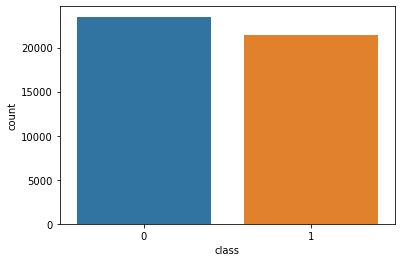

In [9]:
sns.countplot(data=data,
              x='class')

In [10]:
from tqdm import tqdm
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer


In [11]:

def text_preprocessing(text_data):
    final_text= []
      
    for sentence in tqdm(text_data):
        sentence = re.sub(r'[^\w\s]', '', sentence)
        final_text.append(' '.join(token.lower()
                                  for token in str(sentence).split()
                                  if token not in stopwords.words('english')))
  
    return final_text


In [12]:
preprocessed_review = text_preprocessing(data['text'].values)
data['text'] = preprocessed_review

100%|██████████████████████████████████████████████████████████████████████████| 44919/44919 [1:15:18<00:00,  9.94it/s]


In [13]:
data.head(20)

,text,class
0,megyn kelly arrived fox news 12 years ago tele...,0
1,moscow reuters russia fsb security service sai...,1
2,wellington reuters new zealand prime minister ...,1
3,american translation my baby nothin wrong he g...,0
4,warsaw reuters poland defend national identity...,1
5,washington reuters us president donald trumps ...,1
6,berlin reuters china growing military strength...,1
7,riyadh reuters us president donald trump recog...,1
8,by everyone knows donald trump eyeballs russia...,0
9,21st century wire says this nobody takes mains...,0


In [14]:
from sklearn.feature_extraction.text import CountVectorizer
  
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    #print(bag_of_words)
    sum_words = bag_of_words.sum(axis=0) #column here is 0
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1],
                        reverse=True)
    return words_freq[:n]

common_words = get_top_n_words(data['text'], 20)
print(common_words)
df1 = pd.DataFrame(common_words, columns=['Review', 'count'])
df1

[('said', 130004), ('trump', 116009), ('the', 101315), ('us', 63063), ('would', 54935), ('president', 51035), ('people', 41023), ('one', 35480), ('state', 31185), ('also', 31121), ('new', 30860), ('reuters', 28765), ('donald', 27545), ('states', 27037), ('house', 26941), ('government', 26497), ('clinton', 25811), ('it', 25767), ('obama', 24812), ('he', 24599)]


,Review,count
0,said,130004
1,trump,116009
2,the,101315
3,us,63063
4,would,54935
5,president,51035
6,people,41023
7,one,35480
8,state,31185
9,also,31121


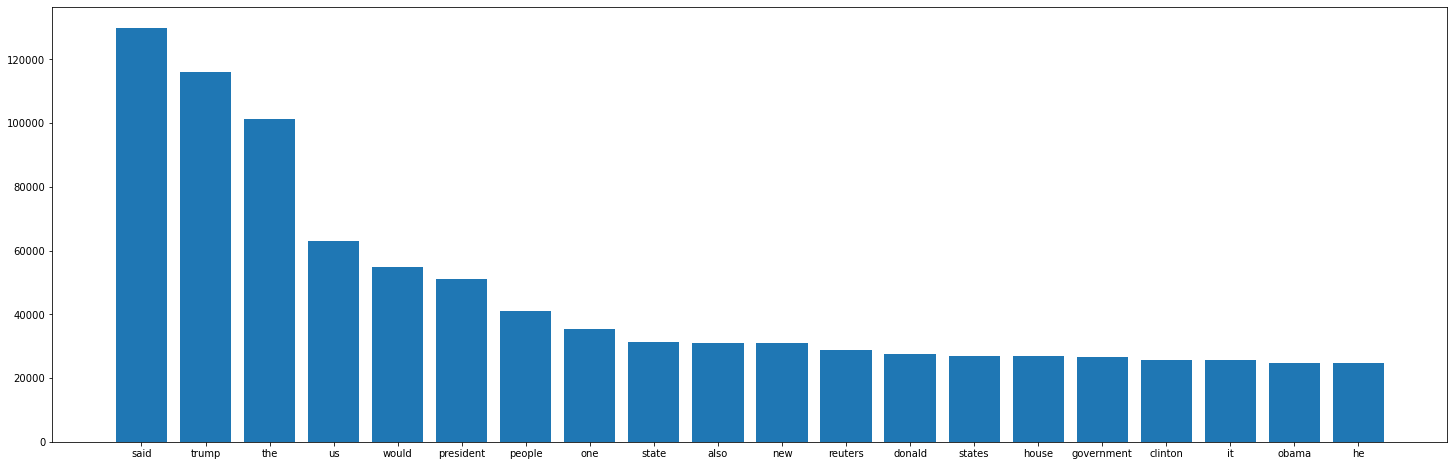

In [15]:
fig = plt.figure(figsize =(25, 8))
plt.bar(df1['Review'],df1['count'])
 
# Show Plot
plt.show()

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
  
x_train, x_test, y_train, y_test = train_test_split(data['text'], 
                                                    data['class'], 
                                                    test_size=0.25)

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
  
vectorization = TfidfVectorizer()
x_train = vectorization.fit_transform(x_train)
x_test = vectorization.transform(x_test)

In [18]:
from sklearn.linear_model import LogisticRegression
  
model = LogisticRegression()
model.fit(x_train, y_train)
  
# testing the model
print(accuracy_score(y_train, model.predict(x_train)))
print(accuracy_score(y_test, model.predict(x_test)))

0.9935884116477188
0.9888691006233303


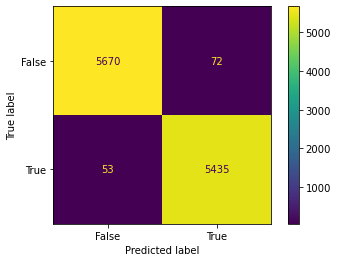

In [19]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, model.predict(x_test))
  
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                                            display_labels=[False, True])
  
cm_display.plot()
plt.show()

In [20]:
from sklearn import svm
SVM = svm.SVC(C=1.0, kernel='linear')
SVM.fit(x_train,y_train)# predict the labels on validation dataset
predictions_SVM = SVM.predict(x_test)# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, y_test)*100)

SVM Accuracy Score ->  99.45681211041853


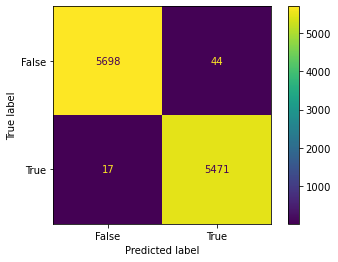

In [21]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predictions_SVM)
  
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                                            display_labels=[False, True])
  
cm_display.plot()
plt.show()

In [22]:
from sklearn.naive_bayes import MultinomialNB

NB = MultinomialNB()
NB.fit(x_train, y_train)
# testing the model
print(accuracy_score(y_train, NB.predict(x_train)))
print(accuracy_score(y_test, NB.predict(x_test)))

0.957760693401407
0.9474621549421193


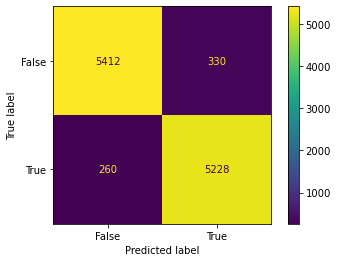

In [23]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, NB.predict(x_test))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                                            display_labels=[False, True])
cm_display.plot()
plt.show()